In [202]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    Samplers,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
import pickle

from ema_workbench.util import utilities
from ema_workbench.analysis import prim, cart

In [3]:
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

# Open Exploration

- No policy (everything 0)
- Latin hypercube of scenarios (10.000 scenarios)
- Result: choose 20 to 50 scenarios

First, the model is initialized, using problem formulation 5.

In [4]:
# initiate model
dike_model, planning_steps = get_model_for_problem_formulation(5)

Then, a reference policy is initialized, in which all policy variables are set to 0.

In [29]:
# set reference policy as all 0's
reference = Policy("0_policy", **{l.name: 0 for l in dike_model.levers})

if we decide to include the timestep:this saves the seperate timesteps to a csv.

In [85]:
n_scenarios = 50

# running the model through EMA workbench, using Latin Hypercube Sampling and the reference policy
with MultiprocessingEvaluator(dike_model, n_processes=-1) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios, policies=reference, uncertainty_sampling=Samplers.LHS)

utilities.save_results(results,'50ScenariosBaseCase.csv')

[MainProcess/INFO] pool started with 11 workers
[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments
100%|██████████████████████████████████████████| 50/50 [00:06<00:00,  7.82it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to C:\Users\beren\Documents\TU_Delft\M_Jaar_1\Q4\Model_based_decision_making\github_map\EPA1361_Model-based_Decision-making\Final Assignment EPA1361\50ScenariosBaseCase.csv


In [100]:
test = pd.read_csv('50ScenariosBaseCase.csv', compression='gzip',on_bad_lines='skip').dropna()
test

,experiments.csv,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,48.0,73.993009,10.0,0.432884,30.125839,1.5,0.345044,69.321135,10.0,0.546383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0_policy,dikesnet
1,61.0,214.326876,10.0,0.001518,210.620838,1.5,0.652543,144.280731,1.5,0.639020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0_policy,dikesnet
2,27.0,286.624680,1.0,0.454057,153.356640,1.0,0.007062,223.350409,1.0,0.539730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,0_policy,dikesnet
3,9.0,183.452561,1.0,0.716853,176.306969,1.0,0.104831,204.875406,1.5,0.487795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0_policy,dikesnet
4,14.0,315.247958,1.5,0.925250,95.496719,1.5,0.713916,111.871442,1.5,0.327617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,0_policy,dikesnet
5,6.0,233.207249,10.0,0.391716,122.872124,1.5,0.737283,273.151842,10.0,0.450830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,0_policy,dikesnet
6,84.0,132.218355,1.5,0.520032,293.409691,10.0,0.545755,175.369099,1.5,0.858358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,0_policy,dikesnet
7,79.0,132.871080,1.5,0.869106,72.229117,1.5,0.665144,146.255706,1.0,0.646957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.0,0_policy,dikesnet
8,3.0,297.276239,10.0,0.902716,151.176215,10.0,0.998742,337.561975,10.0,0.294015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.0,0_policy,dikesnet
9,105.0,255.054477,10.0,0.560610,56.668949,10.0,0.680137,67.584634,10.0,0.971437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,0_policy,dikesnet


However, this is the one that we will be using: combining the timesteps into a single value. The model is run, and results are saved

In [30]:
n_scenarios = 50

# running the model through EMA workbench, using Latin Hypercube Sampling and the reference policy
with MultiprocessingEvaluator(dike_model, n_processes=-1) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=n_scenarios, policies=reference, uncertainty_sampling=Samplers.LHS)

[MainProcess/INFO] pool started with 11 workers
[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments
100%|██████████████████████████████████████████| 50/50 [00:06<00:00,  8.29it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [38]:
# as we do not plan on using the timeseries data, we add them up into a single value. This is then saved to a pickle file for later use

df = pd.DataFrame()
for k in outcomes:
    test_list = []
    for i in range(len(experiments)):
        t = outcomes[k][i].sum()
        test_list.append(t)
    df[k]=test_list

with open('open_exploration_base_policy.pkl','wb') as pickle_file:
    pickle.dump(df, pickle_file)

The data is then loaded into a dataframe. The cost of death variables are calculated and added to the data.

In [102]:
outcomes = pd.read_pickle('open_exploration_base_policy.pkl')

In [103]:
# calculate the cost of death so every column has the same unit (€)
outcomes["A.1_Deaths_Cost"]=outcomes["A.1_Expected Number of Deaths"]*2_700_000
outcomes["A.2_Deaths_Cost"]=outcomes["A.2_Expected Number of Deaths"]*2_700_000
outcomes["A.3_Deaths_Cost"]=outcomes["A.3_Expected Number of Deaths"]*2_700_000
outcomes["A.4_Deaths_Cost"]=outcomes["A.4_Expected Number of Deaths"]*2_700_000
outcomes["A.5_Deaths_Cost"]=outcomes["A.5_Expected Number of Deaths"]*2_700_000

to_drop = ["A.1_Expected Number of Deaths","A.2_Expected Number of Deaths","A.3_Expected Number of Deaths","A.4_Expected Number of Deaths","A.5_Expected Number of Deaths"]

outcomes.drop(to_drop, axis=1, inplace=True)
outcomes['total_cost[€]']= outcomes.sum(axis=1)

In [104]:
#input variables and output combined into a single dataframe
results = experiments.join(outcomes)
results.drop(columns=['policy','model','scenario'], inplace=True)

In [105]:
results

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_Expected Annual Damage,A.5_Dike Investment Costs,RfR Total Costs,Expected Evacuation Costs,A.1_Deaths_Cost,A.2_Deaths_Cost,A.3_Deaths_Cost,A.4_Deaths_Cost,A.5_Deaths_Cost,total_cost[€]
0,5,208.239214,10.0,0.141713,254.860572,10.0,0.505158,165.289317,1.5,0.617947,...,4.494808e+07,0,0.0,0.0,5.424984e+06,0.000000e+00,0.000000e+00,0.000000,1.015855e+05,3.168564e+09
1,44,270.031378,10.0,0.674729,192.896744,1.5,0.872388,292.007818,10.0,0.674191,...,0.000000e+00,0,0.0,0.0,7.219459e+04,3.993040e+04,5.370793e+05,179824.833272,0.000000e+00,2.824371e+08
2,76,174.404652,10.0,0.799560,176.043628,1.5,0.303439,187.073170,10.0,0.183212,...,0.000000e+00,0,0.0,0.0,0.000000e+00,4.693175e+05,7.372641e+06,0.000000,0.000000e+00,2.419902e+09
3,109,222.396846,1.0,0.404439,241.769863,10.0,0.956587,325.206863,1.0,0.988499,...,0.000000e+00,0,0.0,0.0,1.700120e+06,0.000000e+00,0.000000e+00,111767.753789,0.000000e+00,9.878577e+08
4,95,64.719335,1.0,0.927807,239.097775,10.0,0.343217,66.201847,1.5,0.778799,...,0.000000e+00,0,0.0,0.0,0.000000e+00,3.012006e+05,0.000000e+00,65465.501037,0.000000e+00,1.381164e+08
5,47,321.309259,10.0,0.731135,199.151463,1.5,0.106556,259.356977,1.5,0.255708,...,0.000000e+00,0,0.0,0.0,2.333459e+04,1.242919e+06,1.327014e+06,5227.023138,0.000000e+00,6.810000e+08
6,65,273.634334,10.0,0.623494,118.979155,10.0,0.998438,263.928618,10.0,0.154652,...,0.000000e+00,0,0.0,0.0,1.445291e+05,0.000000e+00,8.684280e+06,0.000000,0.000000e+00,2.059551e+09
7,120,75.291966,1.5,0.466926,179.037239,1.0,0.259318,314.818030,1.0,0.069865,...,0.000000e+00,0,0.0,0.0,6.860074e+05,5.488751e+05,9.938539e+06,0.000000,0.000000e+00,2.369934e+09
8,35,30.807058,1.5,0.445286,125.281518,10.0,0.658716,61.495254,1.5,0.297440,...,0.000000e+00,0,0.0,0.0,1.064411e+06,8.256944e+04,4.956583e+06,162284.866355,0.000000e+00,1.625116e+09
9,1,101.094723,10.0,0.188960,139.781617,10.0,0.905801,269.316215,1.5,0.213581,...,0.000000e+00,0,0.0,0.0,5.370143e+06,0.000000e+00,1.570938e+06,0.000000,0.000000e+00,3.376615e+09


In [160]:
total_values = pd.DataFrame()
total_values['Expected Annual Damage'] = results['A.1_Expected Annual Damage'] + \
                                         results['A.2_Expected Annual Damage'] + \
                                         results['A.3_Expected Annual Damage'] + \
                                         results['A.4_Expected Annual Damage'] + \
                                         results['A.5_Expected Annual Damage']

total_values['Dike Investment Costs'] = results['A.1_Dike Investment Costs'] + \
                                        results['A.2_Dike Investment Costs'] + \
                                        results['A.3_Dike Investment Costs'] + \
                                        results['A.4_Dike Investment Costs'] + \
                                        results['A.5_Dike Investment Costs']

total_values['Deaths_Cost'] = results['A.1_Deaths_Cost'] + \
                              results['A.2_Deaths_Cost'] + \
                              results['A.3_Deaths_Cost'] + \
                              results['A.4_Deaths_Cost'] + \
                              results['A.5_Deaths_Cost']

# Visualizations / conclusions?

### General visualization of results
- pairplots
- histograms

### Scenario Discovery
- Boxplots
- PRIM
- Scatterplots
- CART-tree

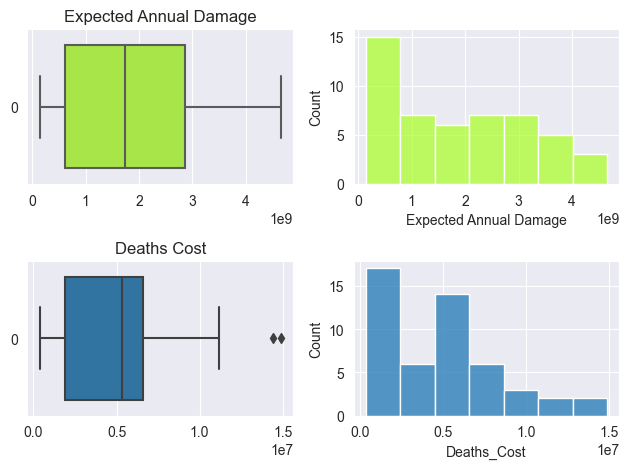

In [159]:
fig, axes = plt.subplots(2,2)

# Expected Annual Damage boxplot
sns.boxplot(
    ax=axes[0,0],
    data=total_values['Expected Annual Damage'],
    orient='h',
    color='greenyellow',
).set(title='Expected Annual Damage')

# Deaths_Cost boxplot
sns.boxplot(
    ax=axes[1,0],
    data=total_values['Deaths_Cost'],
    orient='h',
).set(title='Deaths Cost')

# Expected Annual Damage histogram
sns.histplot(
    ax=axes[0,1],
    data=total_values['Expected Annual Damage'],
    bins=7,
    color='greenyellow',
)

# Deaths_Cost histogram
sns.histplot(
    ax=axes[1,1],
    data=total_values['Deaths_Cost'],
    bins=7,
)

plt.tight_layout()

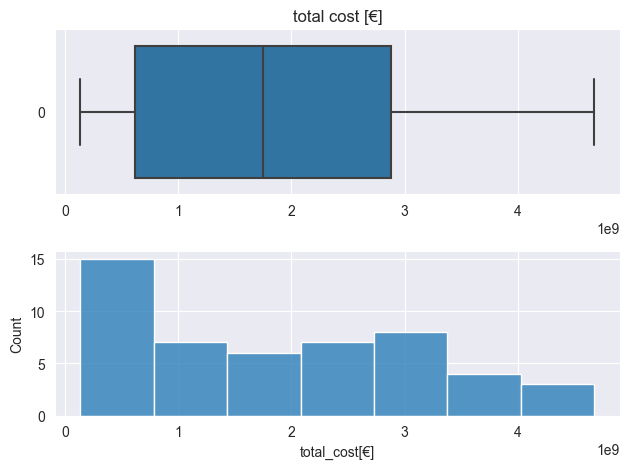

In [173]:
fig, axes = plt.subplots(2)

sns.boxplot(
    ax=axes[0],
    data=results['total_cost[€]'],
    orient='h',
).set(title='total cost [€]')

sns.histplot(
    ax=axes[1],
    data=results['total_cost[€]'],
    bins=7,
)

plt.tight_layout()

Eventueel nog plots per dikering

### PRIM

In [192]:
x = results.iloc[:,:19]  # Only take the uncertainties

y_death_cost = total_values['Deaths_Cost'].values
y_death_cost = y_death_cost > np.percentile(y_death_cost, 75)

[MainProcess/INFO] 50 points remaining, containing 13 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.16, coverage: 0.6153846153846154, density: 1.0 restricted_dimensions: 8


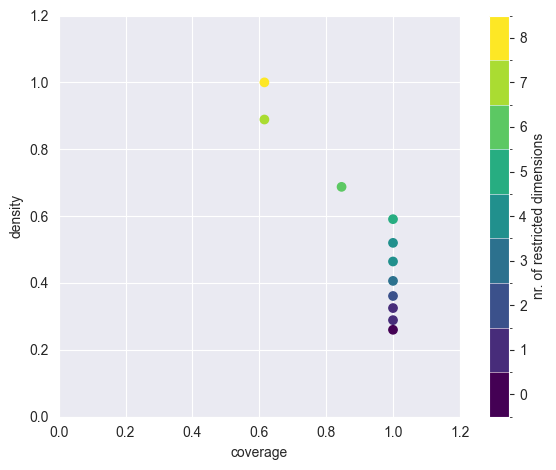

In [197]:
prim_alg = prim.Prim(x,
                     y_death_cost,
                     threshold=0.65,
                     peel_alpha=0.10,) # deze variabelen nog tweaken
box = prim_alg.find_box()

box.show_tradeoff()
plt.tight_layout()

coverage     0.615385
density      1.000000
id          10.000000
mass         0.160000
mean         1.000000
res_dim      8.000000
Name: 10, dtype: float64

                box 10                                 
                   min          max  qp value  qp value
A.1_Bmax     30.807058   279.302346       NaN  0.389744
A.1_pfail      0.01065     0.800787       NaN  0.389744
A.3_pfail     0.008182     0.801415       NaN  0.389744
A.5_Bmax     34.671421   272.858584       NaN  0.389744
A.4_Bmax     30.077424   325.486662       NaN  1.000000
A.4_pfail     0.214817     0.986397  0.167772       NaN
A.3_Brate  {1.5, 10.0}  {1.5, 10.0}  0.232568       NaN
A.5_Brate   {1.5, 1.0}   {1.5, 1.0}  0.232568       NaN



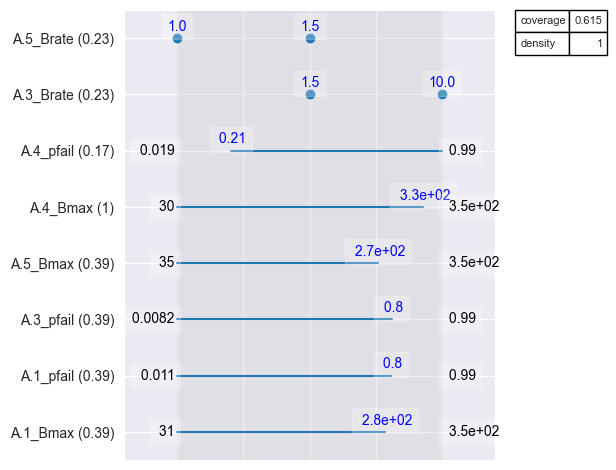

In [198]:
box.inspect()
box.inspect(style='graph')
plt.tight_layout()

C:\Users\beren\Documents\TU_Delft\M_Jaar_1\Q4\Model_based_decision_making\mbd_venv\Lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


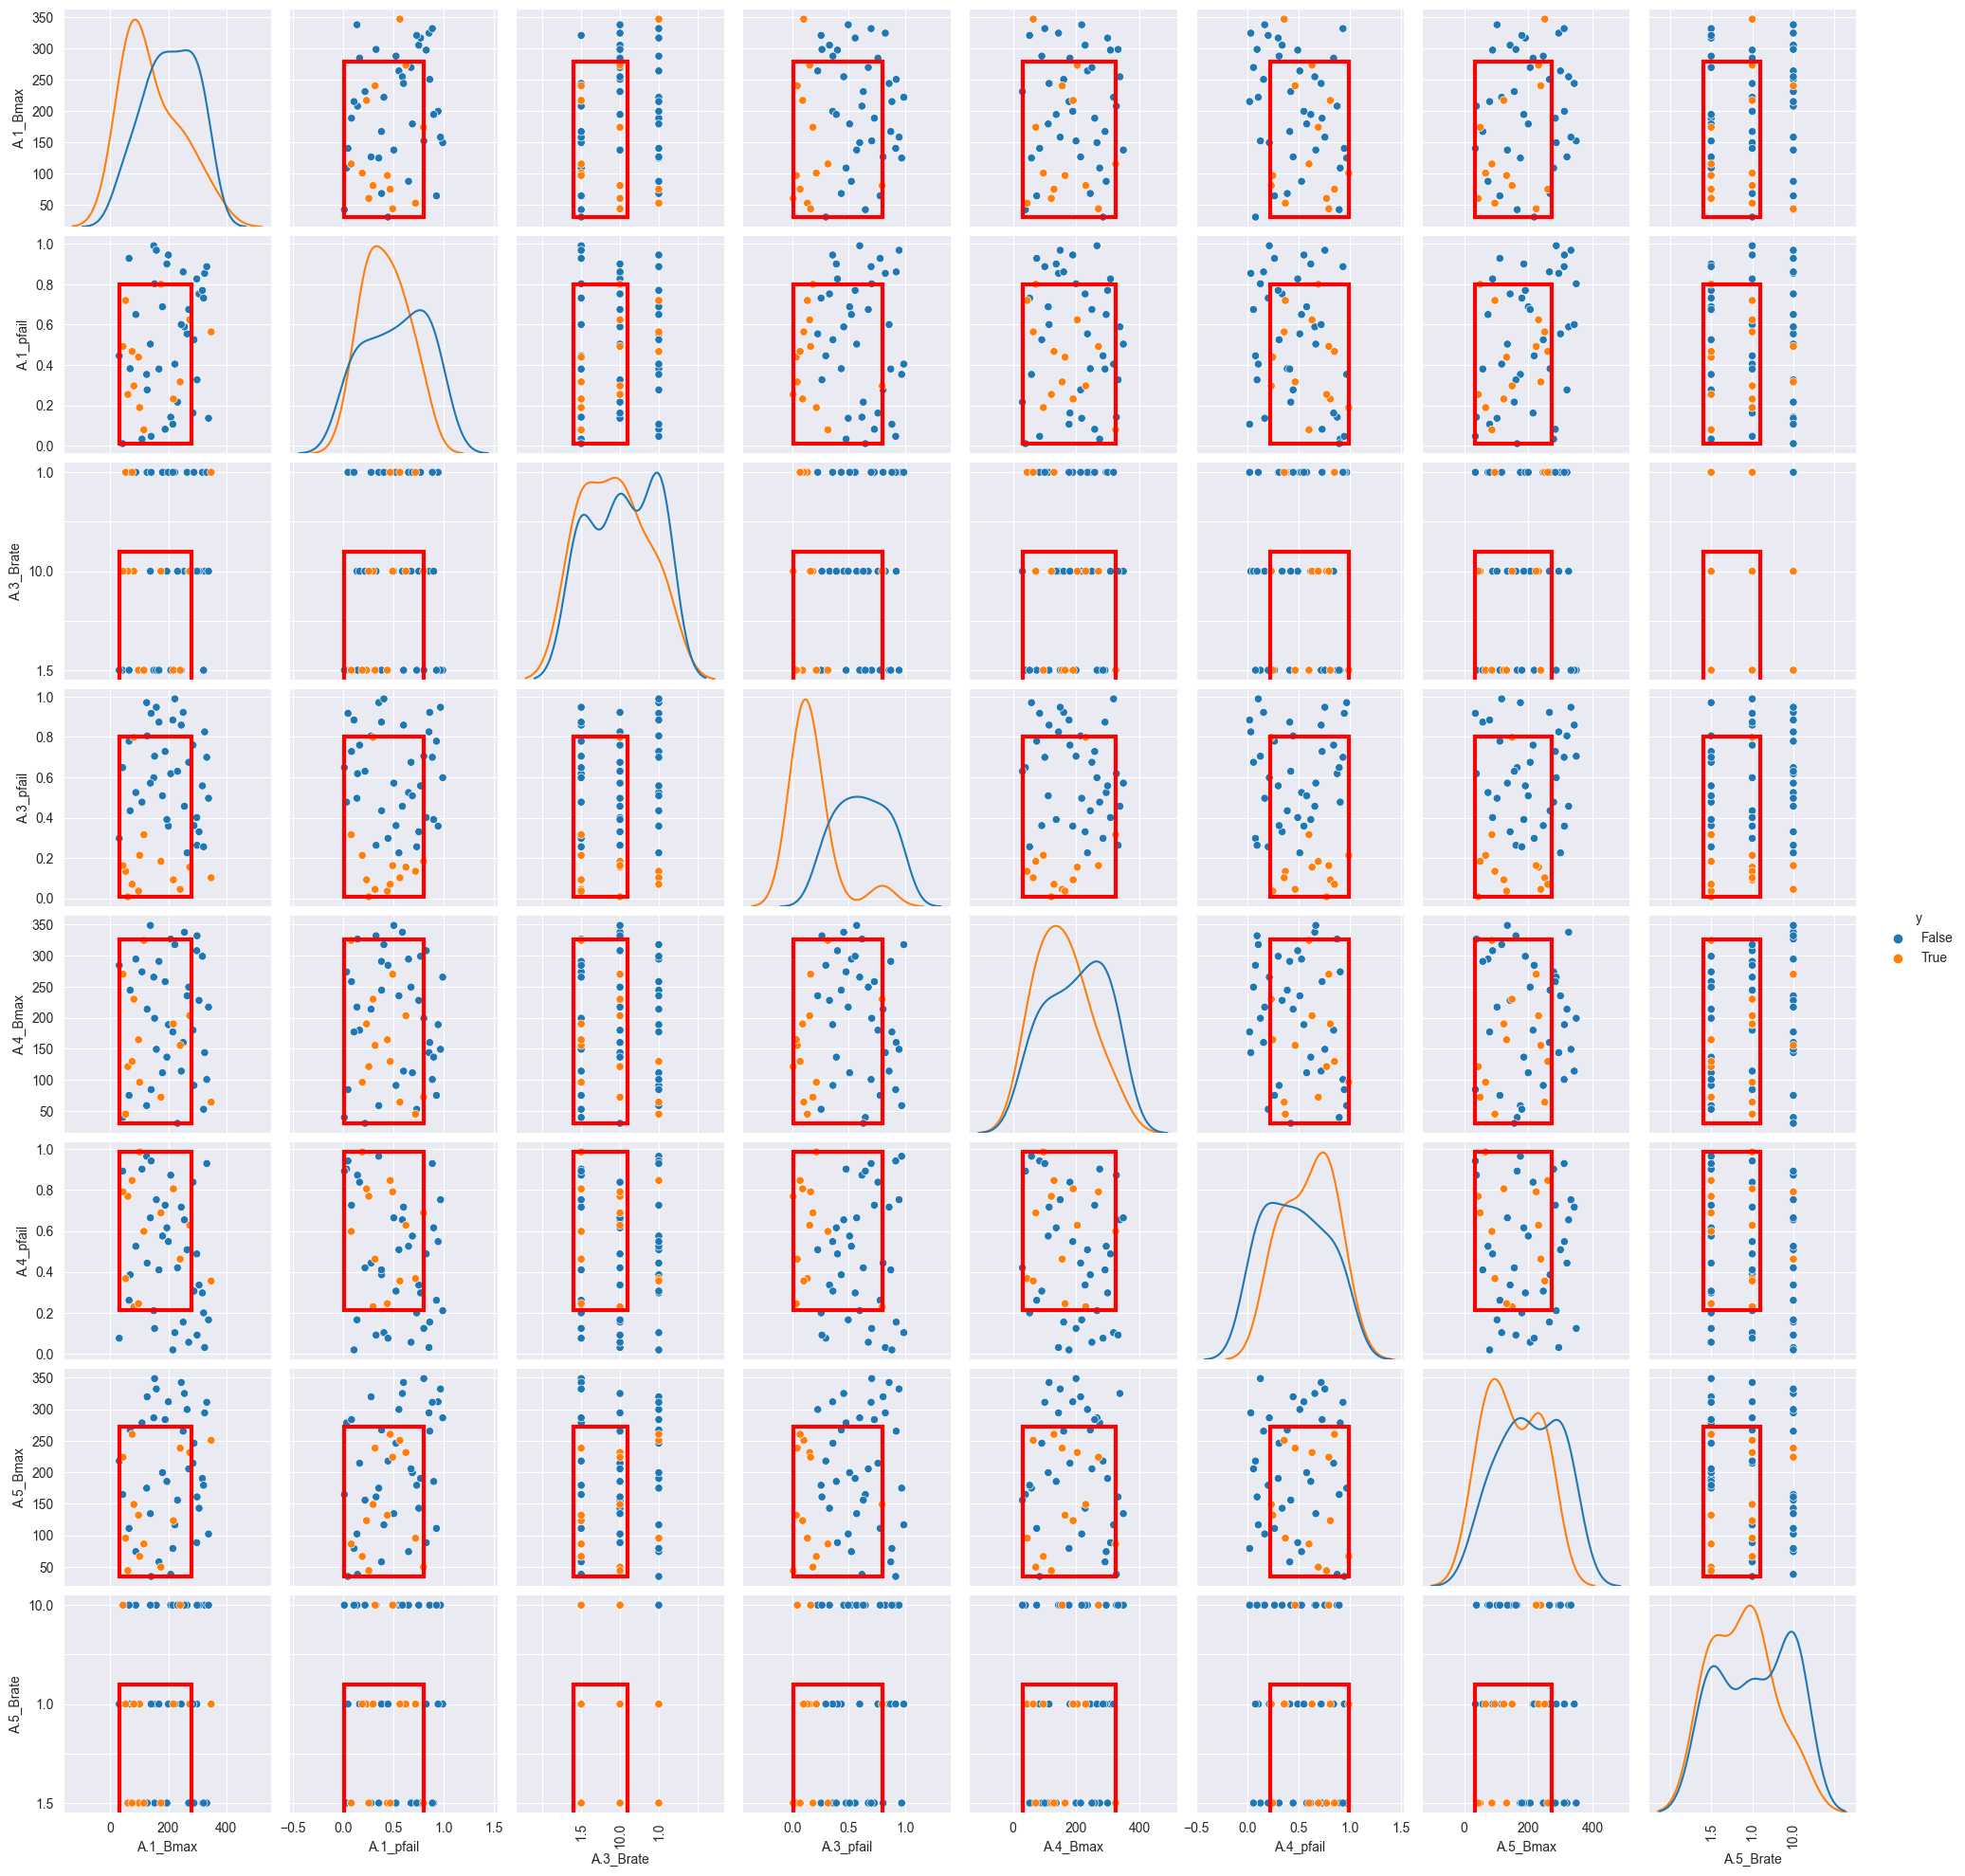

In [201]:
box.select(-1)
box.show_pairs_scatter()
fig = plt.gcf()
plt.tight_layout()

### CART

In [207]:
cart_plot = cart.CART(x, y_death_cost, 0.05)
cart_plot.build_tree()

# Make sure to have GraphViz installed for the tree to show up (https://www.graphviz.org/download/)
fig = cart_plot.show_tree()
fig.set_size_inches(12, 12)
plt.show()

FileNotFoundError: [WinError 2] "dot" not found in path.